In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [2]:
file3 = "../arabidopsis_sim_data/sim_20/sim_20_results.csv"
df1 = pd.read_csv(file3,sep=",")

begin=21
end=300
for i in range(begin,end):
    file3 = "../arabidopsis_sim_data/sim_" + str(i) + "/sim_" + str(i) + "_results_rm5.csv"
    df2 = pd.read_csv(file3,sep=",")
    df1 = pd.concat([df1, df2], axis=0)

df1.reset_index().drop("index",axis=1)

,id,coverage,k-length,metric,score
0,20,10,10.0,BC,0.267049
1,20,10,10.0,BF,0.142970
2,20,10,10.0,CS,0.148497
3,20,30,10.0,BC,0.209258
4,20,30,10.0,BF,0.105875
...,...,...,...,...,...
8943,299,30,20.0,BF_Small,0.006846
8944,299,10,30.0,BF_Small,0.014706
8945,299,30,30.0,BF_Small,0.009185
8946,299,10,40.0,BF_Small,0.019825


In [3]:
info_file = "../arabidopsis_sim_data/sim_20/sim_info_20.csv"
info = pd.read_csv(info_file,sep=",")

begin=21
end=300
for i in range(begin,end):
    info_file2 = "../arabidopsis_sim_data/sim_" + str(i) + "/sim_info_" + str(i) + ".csv"
    df2 = pd.read_csv(info_file2,sep=",")
    info = pd.concat([info, df2], axis=0)

info.reset_index().drop("index",axis=1)
info

,id,pop,pop_size,generations,sampled individuals,mutation rate,coverage,k-length,average pi
0,20,0,100,1000,10,0.000050,10,10,0.016987
0,21,0,100,1000,10,0.000001,10,10,0.000384
0,22,0,100,1000,10,0.000001,10,10,0.000375
0,23,0,100,1000,10,0.000010,10,10,0.004172
0,24,0,100,1000,10,0.000030,10,10,0.019200
...,...,...,...,...,...,...,...,...,...
0,295,0,100,1000,10,0.000050,10,10,0.013319
0,296,0,100,1000,10,0.000100,10,10,0.055968
0,297,0,100,1000,10,0.000001,10,10,0.000347
0,298,0,100,1000,10,0.000010,10,10,0.001973


In [4]:
df = pd.merge(df1,info,on='id').drop(["coverage_y","k-length_y"],axis=1).rename(columns={"coverage_x":"coverage", "k-length_x":"k-length"})

In [5]:
# df = df[df[df['average pi'] < 0.001]['score'] > 0.4]
# df[df[df['average pi'] < 0.001]["score"] > .4]

In [6]:
BC = df[df['metric']=='BC']
BF = df[df['metric']=='BF']
BF2 = df[df['metric']=='BF_Small']
CS = df[df['metric']=='CS']
BF

,id,coverage,k-length,metric,score,pop,pop_size,generations,sampled individuals,mutation rate,average pi
1,20,10,10.0,BF,0.142970,0,100,1000,10,0.00005,0.016987
4,20,30,10.0,BF,0.105875,0,100,1000,10,0.00005,0.016987
7,20,10,20.0,BF,0.301809,0,100,1000,10,0.00005,0.016987
10,20,30,20.0,BF,0.249908,0,100,1000,10,0.00005,0.016987
13,20,10,30.0,BF,0.377102,0,100,1000,10,0.00005,0.016987
...,...,...,...,...,...,...,...,...,...,...,...
8926,299,30,20.0,BF,0.225873,0,100,1000,10,0.00003,0.013754
8929,299,10,30.0,BF,0.410904,0,100,1000,10,0.00003,0.013754
8932,299,30,30.0,BF,0.302779,0,100,1000,10,0.00003,0.013754
8935,299,10,40.0,BF,0.505759,0,100,1000,10,0.00003,0.013754


In [7]:
BF["rank_1"]=BF["score"].rank()

/tmp/ipykernel_1970405/4206275349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BF["rank_1"]=BF["score"].rank()


In [8]:
BF2["rank_2"]=BF2["score"].rank()

/tmp/ipykernel_1970405/3487928432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BF2["rank_2"]=BF2["score"].rank()


In [9]:
BF2

,id,coverage,k-length,metric,score,pop,pop_size,generations,sampled individuals,mutation rate,average pi,rank_2
48,21,10,10.0,BF_Small,0.013897,0,100,1000,10,0.000001,0.000384,1754.0
49,21,30,10.0,BF_Small,0.000951,0,100,1000,10,0.000001,0.000384,26.0
50,21,10,20.0,BF_Small,0.020467,0,100,1000,10,0.000001,0.000384,2112.0
51,21,30,20.0,BF_Small,0.001158,0,100,1000,10,0.000001,0.000384,95.0
52,21,10,30.0,BF_Small,0.024730,0,100,1000,10,0.000001,0.000384,2186.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8943,299,30,20.0,BF_Small,0.006846,0,100,1000,10,0.000030,0.013754,1003.0
8944,299,10,30.0,BF_Small,0.014706,0,100,1000,10,0.000030,0.013754,1808.0
8945,299,30,30.0,BF_Small,0.009185,0,100,1000,10,0.000030,0.013754,1288.0
8946,299,10,40.0,BF_Small,0.019825,0,100,1000,10,0.000030,0.013754,2088.0


In [10]:
comb_df=merged_df = pd.merge(BF, BF2, on=["id", "coverage", "k-length", "pop", "pop_size", "generations", "sampled individuals"], suffixes=('_BF1', '_BF2'))

In [23]:
sum(abs((comb_df.rank_1 - comb_df.rank_2)))/2231

88.12909009412819

In [24]:
ranks = pd.DataFrame(comb_df.rank_1 - comb_df.rank_2)

In [30]:
# comb_df["ranks"]=ranks
comb_df["mutation rate_BF1"].value_counts()

mutation rate_BF1
0.000001    456
0.000030    448
0.000100    448
0.000010    440
0.000050    439
Name: count, dtype: int64

In [29]:
comb_df[comb_df["ranks"]==186]

,id,coverage,k-length,metric_BF1,score_BF1,pop,pop_size,generations,sampled individuals,mutation rate_BF1,average pi_BF1,rank_1,metric_BF2,score_BF2,mutation rate_BF2,average pi_BF2,rank_2,ranks
268,54,10,30.0,BF,0.284661,0,100,1000,10,0.00005,0.017683,1389.0,BF_Small,0.008546,0.00005,0.017683,1203.0,186.0


In [13]:
ranks.rename(columns={0:'Rank Change'})

,Rank Change
0,-274.0
1,1.0
2,18.0
3,20.0
4,35.0
...,...
2226,131.0
2227,-48.0
2228,157.0
2229,-115.0


array([[<Axes: title={'center': '0'}>]], dtype=object)

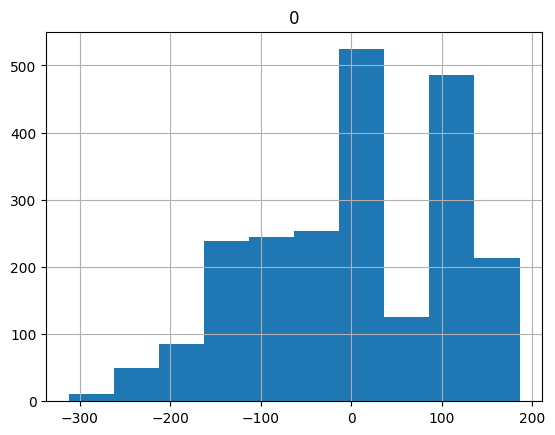

In [14]:
ranks.hist()

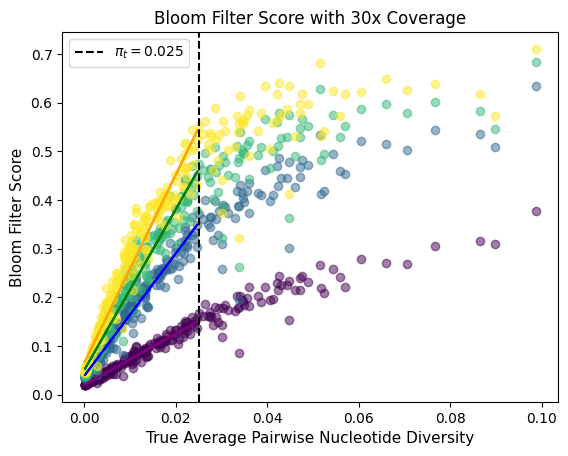

In [15]:
plot_df = BF[BF["coverage"]==30]; ADJUSTED = False

fig, ax = plt.subplots()

kmers = {10: 'purple', 20: 'blue', 30: 'green', 40: 'orange'}
viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(kmers)))
color_1 = ["purple","blue","green","orange"]

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    plt.scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.5)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    plt.plot(X, reg.predict(X), color=color_1[i])

if(not ADJUSTED):
    plt.axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

plt.title("Bloom Filter Score with 30x Coverage")
plt.ylabel("Bloom Filter Score", fontsize=11, color="black")
plt.xlabel(r"True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    plt.xlim(0,0.025)
else:
    plt.legend()

plt.show()

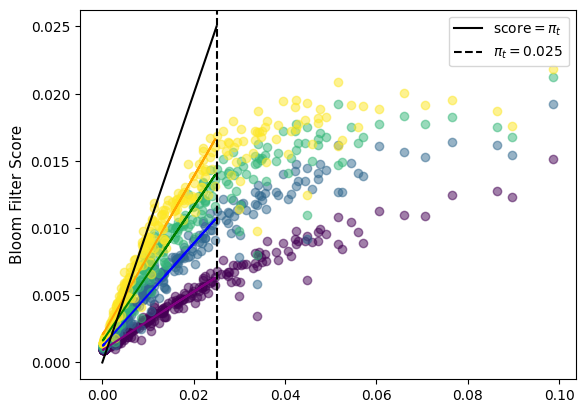

In [16]:
plot_df = BF2[BF2["coverage"]==30]; ADJUSTED = False

fig, ax = plt.subplots()

color_1 = ["Purple","Blue","Green","Orange"]
kmers = {10: 'purple', 20: 'blue', 30: 'green', 40: 'orange'}
viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(kmers)))
color_1 = ["purple","blue","green","orange"]

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    plt.scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.5)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    plt.plot(X, reg.predict(X), color=color_1[i])


x=[0,.025]
y=[0,.025]

plt.plot(x,y,"-k",label=r'score$=\pi_{t}$')

if(not ADJUSTED):
    plt.axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

plt.ylabel("Bloom Filter Score", fontsize=11, color="black")
# plt.xlabel("True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    plt.xlim(0,0.025)
else:
    plt.legend()

plt.show()

In [17]:
BF2[BF2["coverage"]==30]["mutation rate"].value_counts()

mutation rate
0.000001    228
0.000030    224
0.000100    224
0.000010    220
0.000050    219
Name: count, dtype: int64

In [18]:
BF[BF["coverage"]==30]["mutation rate"].value_counts()

mutation rate
0.000001    228
0.000030    224
0.000100    224
0.000050    223
0.000010    220
Name: count, dtype: int64

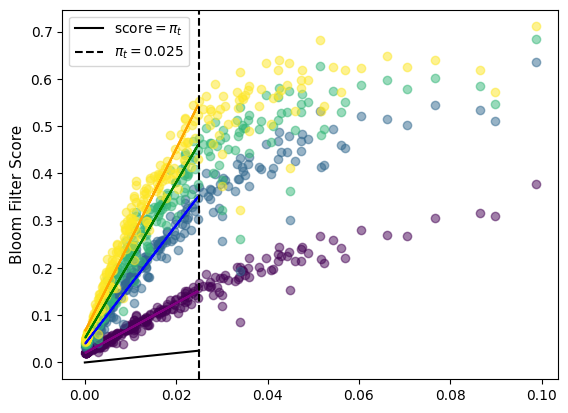

In [19]:
plot_df = BF[BF["coverage"]==30]; ADJUSTED = False

fig, ax = plt.subplots()

color_1 = ["Purple","Blue","Green","Orange"]
kmers = {10: 'purple', 20: 'blue', 30: 'green', 40: 'orange'}
viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(kmers)))
color_1 = ["purple","blue","green","orange"]

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    plt.scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.5)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    plt.plot(X, reg.predict(X), color=color_1[i])


x=[0,.025]
y=[0,.025]

plt.plot(x,y,"-k",label=r'score$=\pi_{t}$')

if(not ADJUSTED):
    plt.axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

plt.ylabel("Bloom Filter Score", fontsize=11, color="black")
# plt.xlabel("True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    plt.xlim(0,0.025)
else:
    plt.legend()

plt.show()

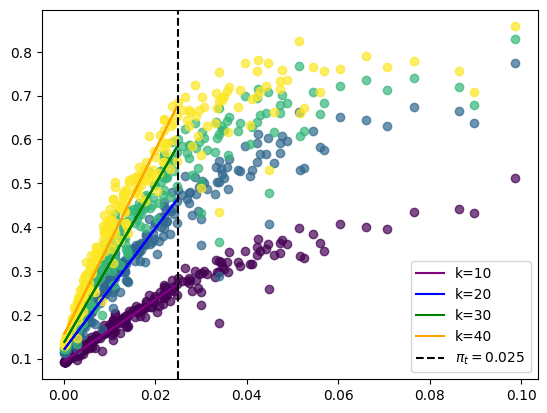

In [20]:
plot_df = BC[BC["coverage"]==30]; ADJUSTED = False

fig, ax = plt.subplots()

num_kmers = 4

k=[10,20,30,40]

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_kmers))
color_1 = ["purple","blue","green","orange"]

for i in range(0,num_kmers):
    kmer_data = plot_df[plot_df['k-length']== k[i]]

    plt.scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    plt.plot(X, reg.predict(X), color=color_1[i], label="k=" + str(k[i]))

if(not ADJUSTED):
    plt.axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

# if(ADJUSTED):
#     plt.title("Bray-Curtis Score with 30x Coverage (Adjusted)")
# else:
    # plt.title("Bray-Curtis Score with 30x Coverage")
# plt.ylabel("Bray-Curtis Score", fontsize=11, color="black")
# plt.xlabel(r"True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    plt.xlim(0,0.025)

plt.legend()

plt.show()

[array([0.267004, 0.004874, 0.329415, 1.      ])
 array([0.127568, 0.566949, 0.550556, 1.      ])
 array([0.993248, 0.906157, 0.143936, 1.      ])]
Score: Bray-Curtis Slope: 7.0563562897989005 R^2: 0.9710851785519704 Inter: 0.0935111196235427
Score: Cosine Similarity Slope: 5.9794213743654705 R^2: 0.9720896727535088 Inter: 0.022248592277424442
Score: Counting Bloom Filter Slope: 5.281454440838475 R^2: 0.9726583708169143 Inter: 0.01989225688701249


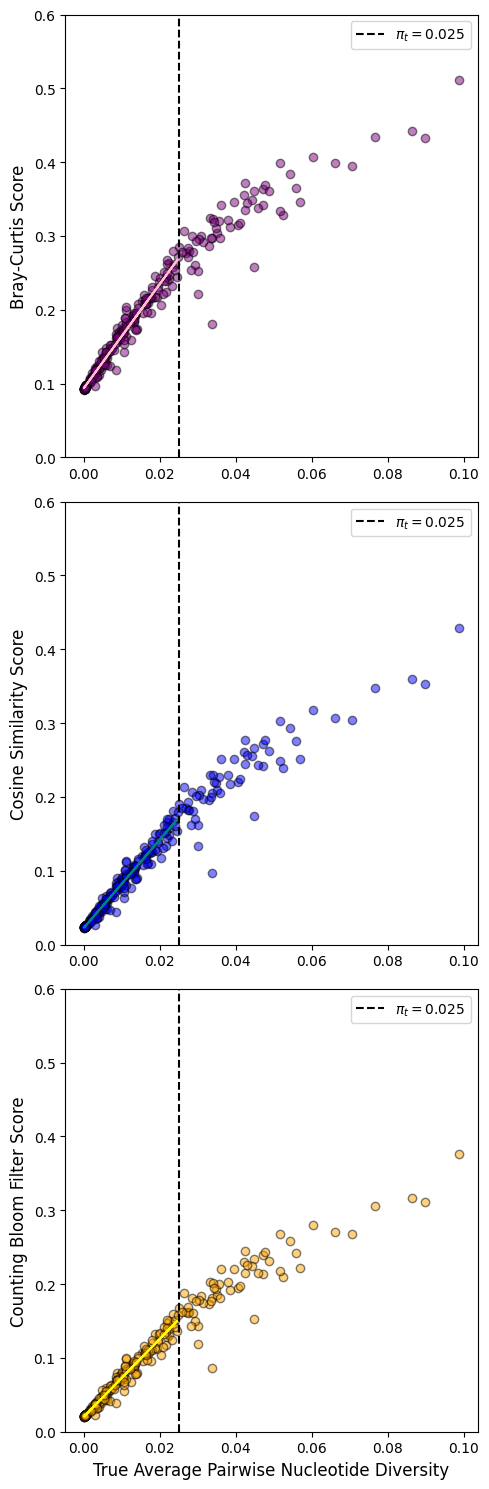

In [21]:
coverage = 30
k_len = 10

df1 = BC[BC["coverage"]==coverage]
df1 = df1[df1["k-length"]==k_len]
df2 = CS[CS["coverage"]==coverage]
df2 = df2[df2["k-length"]==k_len]
df3 = BF[BF["coverage"]==coverage]
df3 = df3[df3["k-length"]==k_len]

num_plots = 3

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_plots))
color_1 = ["purple","blue","orange"]
color_2 = ["pink","teal","yellow"]
score = ["Bray-Curtis","Cosine Similarity", "Counting Bloom Filter"]

colors = np.array([0,0,0], dtype=object)
colors[0] = viridis_colors[0]
colors[1] = viridis_colors[1]
colors[2] = viridis_colors[2]

print(colors)

# Create subplots
# fig = plt.subplots(figsize=(10, 5))
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

# Loop through each subplot
for i, df in enumerate([df1, df2, df3]):
    ax = axes[i]
    ax.scatter(df["average pi"],df["score"],color=color_1[i],label=None,alpha=0.5,edgecolors="black")

    x = np.array(df['average pi']).reshape(-1, 1)
    sub_df2 = df[df["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    # Calculate R^2 value
    r2 = r2_score(y, reg.predict(X))
    # Get slope
    slope = reg.coef_[0]

    inter = reg.intercept_

    print("Score: " + score[i] + " Slope: " + str(slope) + " R^2: " + str(r2) + " Inter: " + str(inter))

    ax.plot(X, reg.predict(X), color=color_2[i])
    ax.axvline(x=0.025, linestyle='--', color='black', label=r'$\pi_{t} = 0.025$')

    # ax.set_title(score[i] + "",fontsize=16)
    if(i==2):
        ax.set_xlabel("True Average Pairwise Nucleotide Diversity",fontsize=12)
    ax.set_ylabel(score[i] + " Score",fontsize=12)
    ax.set_ylim(0, 0.6)
    ax.legend()

# Share y-axis among subplots
# fig.suptitle("Measures with " + str(coverage) + "x Coverage and " + str(k_len) + "-mers",fontsize=18, fontweight='bold')
plt.tight_layout()
# plt.legend()
plt.show()

[array([0.267004, 0.004874, 0.329415, 1.      ])
 array([0.127568, 0.566949, 0.550556, 1.      ])
 array([0.993248, 0.906157, 0.143936, 1.      ])]
Score: Bray-Curtis Slope: 7.0563562897989005 R^2: 0.9710851785519704 Inter: 0.0935111196235427
Score: Cosine Similarity Slope: 5.9794213743654705 R^2: 0.9720896727535088 Inter: 0.022248592277424442
Score: Counting Bloom Filter Slope: 5.281454440838475 R^2: 0.9726583708169143 Inter: 0.01989225688701249


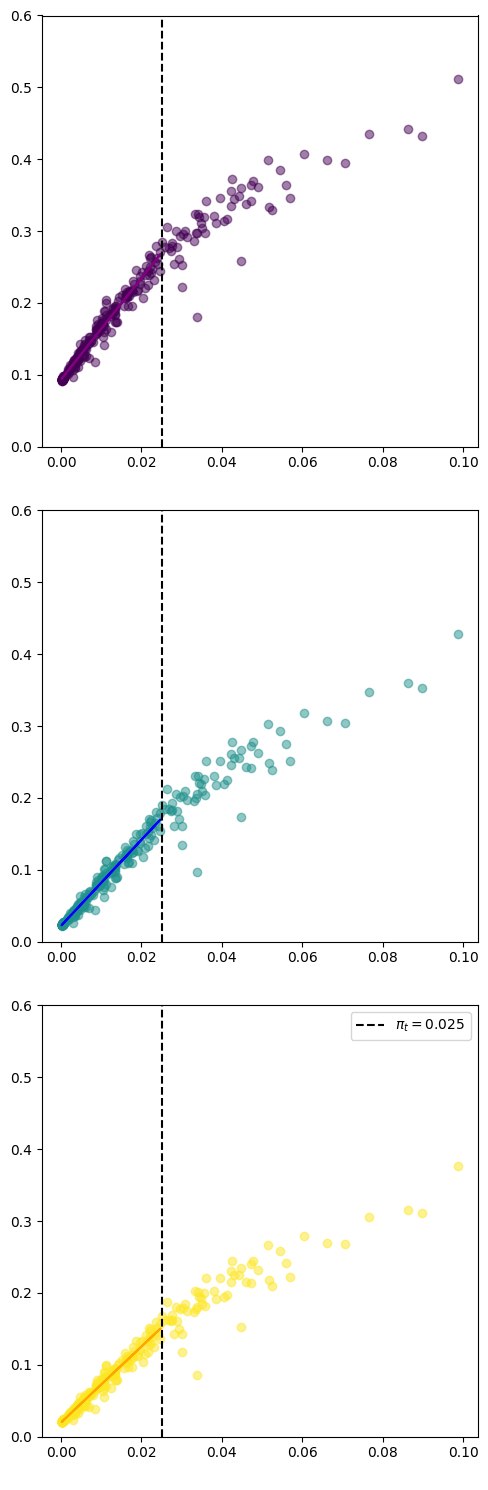

In [22]:
coverage = 30
k_len = 10

df1 = BC[BC["coverage"]==coverage]
df1 = df1[df1["k-length"]==k_len]
df2 = CS[CS["coverage"]==coverage]
df2 = df2[df2["k-length"]==k_len]
df3 = BF[BF["coverage"]==coverage]
df3 = df3[df3["k-length"]==k_len]

num_plots = 3

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_plots))
color_1 = ["purple","blue","orange"]
score = ["Bray-Curtis","Cosine Similarity", "Counting Bloom Filter"]

colors = np.array([0,0,0], dtype=object)
colors[0] = viridis_colors[0]
colors[1] = viridis_colors[1]
colors[2] = viridis_colors[2]

print(colors)

# Create subplots
# fig = plt.subplots(figsize=(10, 5))
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

# Loop through each subplot
for i, df in enumerate([df1, df2, df3]):
    ax = axes[i]
    ax.scatter(df["average pi"],df["score"],color=colors[i],label=None,alpha=0.5)

    x = np.array(df['average pi']).reshape(-1, 1)
    sub_df2 = df[df["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    # Calculate R^2 value
    r2 = r2_score(y, reg.predict(X))
    # Get slope
    slope = reg.coef_[0]

    inter = reg.intercept_

    print("Score: " + score[i] + " Slope: " + str(slope) + " R^2: " + str(r2) + " Inter: " + str(inter))

    ax.plot(X, reg.predict(X), color=color_1[i])
    ax.axvline(x=0.025, linestyle='--', color='black', label=r'$\pi_{t} = 0.025$')

    # ax.set_title(score[i] + "",fontsize=16)
    # if(i==2):
        # ax.set_xlabel("True Average Pairwise Nucleotide Diversity",fontsize=12)
    ax.set_xlabel(" ")
    # ax.set_ylabel(score[i] + " Score",fontsize=12)
    ax.set_ylim(0, 0.6)
    if(i==2):
        ax.legend()

# Share y-axis among subplots
# fig.suptitle("Measures with " + str(coverage) + "x Coverage and " + str(k_len) + "-mers",fontsize=18, fontweight='bold')
plt.tight_layout()
# plt.legend()
plt.show()